
<div style=" padding: 40px; text-align: center; color: #8e44ad;text-shadow: 2px 2px 0px #f1c40f; ">
    <h1 style="font-family: 'Roboto', sans-serif;ext-align: center;  font-size: 72px; margin-top: 0; margin-bottom: 20px;">
    Statistics
    </h1>
</div>

<div style=" padding: 40px; text-align: center; color: #8e44ad;text-shadow: 2px 2px 0px #f1c40f; ">
    <h1 style="font-family: 'Roboto', sans-serif;ext-align: center;  font-size: 72px; margin-top: 0; margin-bottom: 20px;">
    Exercise 5
    </h1>
</div>

![SNOWFALL](https://ik.imagekit.io/ccyubla1p9v/wp-content/uploads/2019/02/AB-Testing.png)


<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">
Marketing A/B Testing 
</p>


<br>

<!-- <div style="text-align:center;">
<img  src="air.png">
</div> -->




<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">

About Dataset

Marketing A/B testing dataset Marketing companies want to run successful campaigns, but the market is complex and several options can work. So normally they tun A/B tests, that is a randomized experimentation process wherein two or more versions of a variable (web page, page element, banner, etc.) are shown to different segments of people at the same time to determine which version leaves the maximum impact and drive business metrics.

The companies are interested in answering two questions:

Would the campaign be successful?
If the campaign was successful, how much of that success could be attributed to the ads?
With the second question in mind, we normally do an A/B test. The majority of the people will be exposed to ads (the experimental group). And a small portion of people (the control group) would instead see a Public Service Announcement (PSA) (or nothing) in the exact size and place the ad would normally be.

The idea of the dataset is to analyze the groups, find if the ads were successful, how much the company can make from the ads, and if the difference between the groups is statistically significant.





<div style="align:center">


Data dictionary:

Index: Row index

user id: User ID (unique)

test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement

converted: If a person bought the product then True, else is False
total ads: Amount of ads seen by person

most ads day: Day that the person saw the biggest amount of ads

most ads hour: Hour of day that the person saw the biggest amount of ads
v

</div>

</p>   

    

<hr>
<a id="1"></a>
<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📚 IMPORTING LIBRARIES</p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy import stats

<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📖 LOADING DATA</p>

In [2]:
df = pd.read_csv('marketing_AB.csv')

<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🧐 Data Overview</p>

In [3]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
df.tail()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23
588100,588100,1237779,ad,False,1,Tuesday,23


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [6]:
df.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279667,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


In [7]:
df.shape

(588101, 7)

<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📊 Data Cleaning</p>

In [11]:
df.drop('Unnamed: 0' , axis=1 , inplace=True)

In [12]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14





<div class="alert alert-block alert-info ;"> 📌  The Unnamed:0 column got dropped, but the current column names have space in between, which may add difficulty later. So it is better to rename the 'user id ' to 'user_id' format. Since most column names have to be adjusted, I'm going to use lambda function. </div>



In [13]:
df.rename(columns= lambda x : x.replace(' ' , '_') , inplace=True)
df.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [14]:
df.isnull().any()

user_id          False
test_group       False
converted        False
total_ads        False
most_ads_day     False
most_ads_hour    False
dtype: bool

In [15]:
df.isnull().sum()

user_id          0
test_group       0
converted        0
total_ads        0
most_ads_day     0
most_ads_hour    0
dtype: int64

<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📊 EDA</p>

In [16]:
df['test_group'].value_counts()

ad     564577
psa     23524
Name: test_group, dtype: int64

In [17]:
df.groupby('test_group')['converted'].value_counts()

test_group  converted
ad          False        550154
            True          14423
psa         False         23104
            True            420
Name: converted, dtype: int64

In [18]:
df.groupby(['test_group' , 'converted']).count()['user_id']

test_group  converted
ad          False        550154
            True          14423
psa         False         23104
            True            420
Name: user_id, dtype: int64

In [19]:
df.groupby(['test_group' , 'converted']).count()['user_id'].unstack('converted')

converted,False,True
test_group,,
ad,550154,14423
psa,23104,420


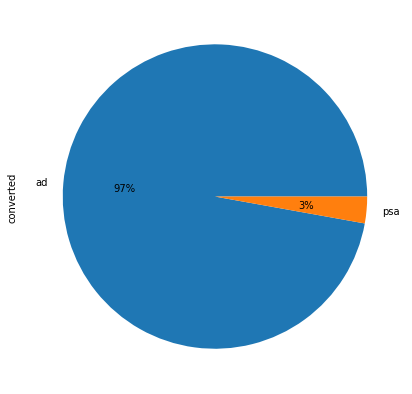

In [20]:
convertedgroup = df.groupby('test_group').sum()['converted'].plot.pie(figsize=(7,7) , autopct='%1.0f%%')
plt.show();

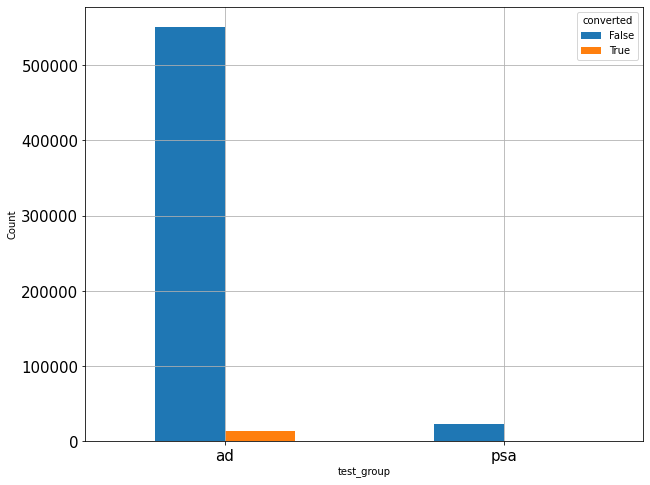

In [21]:
ax = df.groupby(['test_group' , 'converted']).count()['user_id'].unstack('converted').plot(
    kind='bar',
    figsize=(10,8),
    grid=True
)

ax.tick_params(axis='x' , labelsize=15)
plt.xticks(rotation='horizontal')
ax.tick_params(axis='y' , labelsize=15)
ax.set_ylabel('Count')

plt.show()

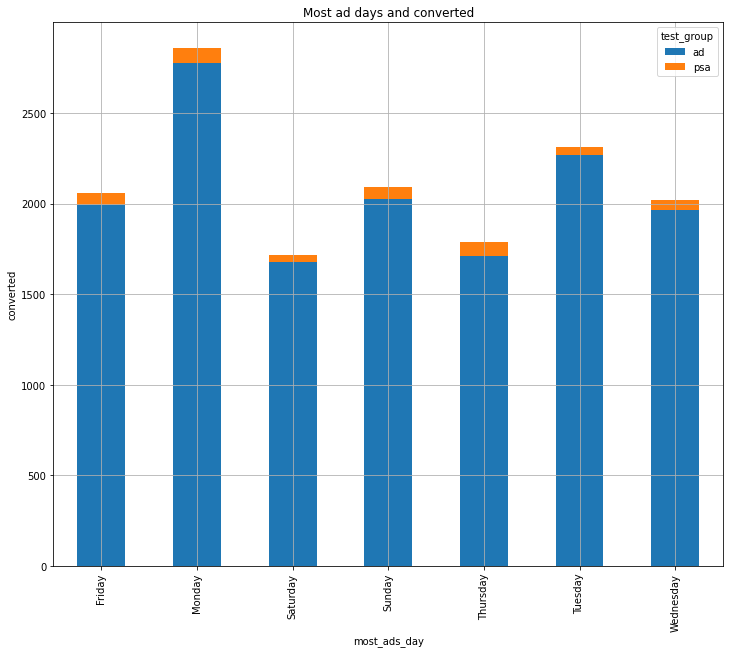

In [22]:
ax = df.groupby(by=['most_ads_day' , 'test_group']).sum()['converted'].unstack('test_group').plot(
    kind='bar',
    figsize=(12,10),
    grid = True , 
    stacked=True
)

ax.set_ylabel('converted')
ax.set_title('Most ad days and converted')
plt.show()

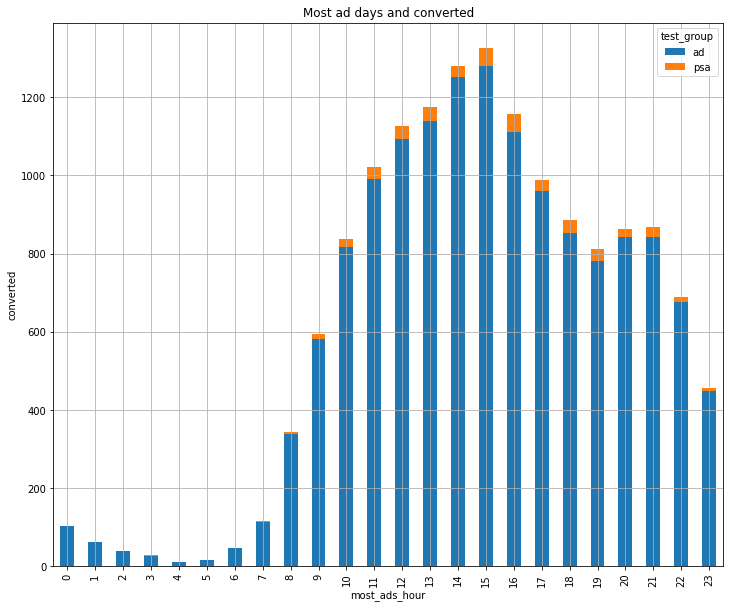

In [23]:
ax = df.groupby(by=['most_ads_hour' , 'test_group']).sum()['converted'].unstack('test_group').plot(
    kind='bar',
    figsize=(12,10),
    grid = True , 
    stacked=True
)

ax.set_ylabel('converted')
ax.set_title('Most ad days and converted')
plt.show()

<hr>
<a id="1"></a>
<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> Normal </p>

In [ ]:
# shapiro test dosent work in this sample !!!! 
# so we use another way ----> bootstrap 

# from scipy.stats import shapiro, levene

# # جدا سازی داده‌ها بر اساس گروه تست (test_group)
# group_ads = df[df["test_group"] == "ads"]
# group_psa = df[df["test_group"] == "psa"]

# # آزمون Shapiro-Wilk برای توزیع نرمال پیروی
# _, pvalue_ads = shapiro(group_ads["converted"])
# _, pvalue_psa = shapiro(group_psa["converted"])

# print("Shapiro-Wilk Test:")
# print("Ads Group - P-Value:", pvalue_ads)
# print("PSA Group - P-Value:", pvalue_psa)

# # آزمون Levene برای برابر بودن واریانس
# _, pvalue_variance = levene(group_ads["converted"], group_psa["converted"])

# print("Levene Test:")
# print("P-Value:", pvalue_variance)


ValueError: object arrays are not supported

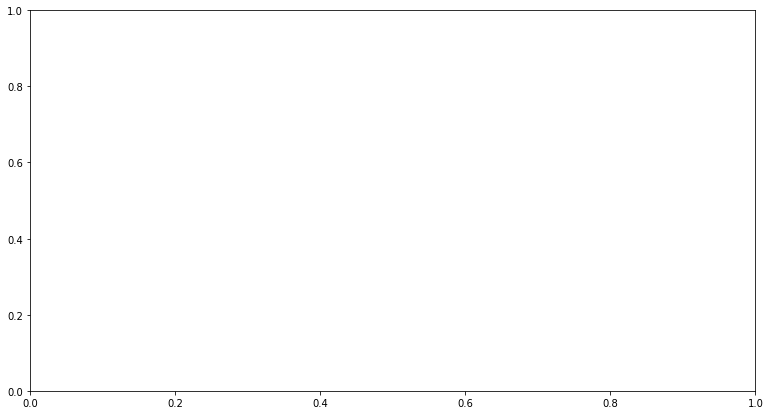

In [25]:
fig = plt.figure(figsize=(13,7))
ax = sns.kdeplot(df.loc[(df['test_group'] == 'ad'), 'converted'], color='b', fill=True, label='Seen ad')
ax = sns.kdeplot(df.loc[(df['test_group'] == 'psa'), 'converted'], color='r', fill=True, label='Not seen')
ax.set(xlabel='Test group', ylabel='Frequency')
plt.title('Test group VS. Converted')
plt.legend();

# Bootstrap analysis

From the density plot,we can clearly see the sampling distribution of the mean (obtained through the bootstrap resampling process) is approximately normal. It allows for the application of statistical tests and confidence intervals that rely on the assumption of normality. For example, we can perform hypothesis testing or construct confidence intervals through using methods like the t-test or z-test based on the assumption of normality.

<hr>
<a id="1"></a>
<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> Code Base Test </p>




<div class="alert alert-block alert-info ;"> 📌  با توجه به نتایج تبلیغات باعث افزایش فروش شده است . حال باید برسی کنیم ایا این افزایش بر اساس آماری معنا دار هست یا نه ؟ </div>




<div class="alert alert-block alert-info ;"> 📌 According to the results of advertising, it has increased sales. Now we have to check whether this increase is statistically significant or not? </div>





In [ ]:
# import numpy as np
# import pandas as pd
# import seaborn as sns



# # Separate data by experimental and control group
# ad_experimental = df[df['test_group'] == 'ad']
# psa_control = df[df['test_group'] == 'psa']

# # Calculate the average conversion rate for each group
# ad_converted = ad_experimental['converted'].mean()
# psa_converted = psa_control['converted'].mean()

# # Calculate the average conversion rate difference
# d = psa_converted - ad_converted

# # Formation of data matrix for AB test

# sales = np.array([
#     np.append(np.zeros(len(ad_experimental)), np.ones(len(psa_control))),
#     np.append(ad_experimental['converted'], psa_control['converted'])
# ])

# # Simulation function
# def sh_exp(N):
#     experiment_diff_mean = np.empty([N, 1])
#     for times in np.arange(N):
#         sales_t = sales.T
#         experiment_label = np.random.randint(0, 2, len(sales_t))
#         experiment_data = np.array([
#             experiment_label,
#             sales_t[:, 1]
#         ]).T
#         experiment_diff_mean[times] = experiment_data[experiment_data[:, 0] == 1][:, 1].mean() - experiment_data[experiment_data[:, 0] == 0][:, 1].mean()
#     return experiment_diff_mean

# # Run the simulation function
# e1 = sh_exp(1000)



# # Distribution chart
# sns.displot(e1, bins=50);


<hr>
<a id="1"></a>
<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> TTest </p>

<hr>
<a id="1"></a>
<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> chi2 Test </p>

The chi-squared statistic of 54.005823883685245 is much larger than the critical value of 3.841, which is the cutoff for significance at the 0.05 level. This means that the difference between the two conversion rates is very likely to be real and not due to chance.

The p-value of 1.9989623063390075e-13 is also very small. This means that there is a very small probability that the difference between the two conversion rates could have occurred by chance.

In other words, the chi-squared statistic and p-value suggest that there is strong evidence to conclude that there is a significant difference between the ad conversion rate and the PSA conversion rate.

In your case, the chi-squared statistic is greater than the critical value and the p-value is much less than 0.05, so you can conclude that the difference between the two conversion rates is significant at the 0.05 level.

<hr>
<a id="1"></a>
<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> END </p>